#jupyter nbconvert --to html /content/REDES_COMPLEXAS_NOTEBOOK_Q6.ipynb

In [2]:
# Q7 -Classificação de redes

import numpy as np
import networkx as nx
from numpy  import *
from random import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Exercício 1. 

Selecione 3 redes biológicas, 3 redes sociais e 3 redes tecnológicas desses endereços:

https://networks.skewed.de

http://konect.cc/networks/

https://icon.colorado.edu/

Faça a classificação das redes usando os modelos e medidas que aprendemos na aula. Não se esqueça de selecionar o mesmo N e grau médio que a rede original na construção dos modelos.

Verifique qual o modelo mais adequado para cada rede.

Hipótese: redes do mesmo tipo seguem o mesmo modelo.

Verifique se essa hipótese é verdadeira.
Bônus (não é obrigatório): identifique as principais diferenças entre os modelos. Isto é, quais medidas mais contribuem para que uma rede seja classificada como sendo do modelo BA.

# Rede Social

In [3]:
As três bases escolhidas na categoria social foram:

* Game of Trones: Rede de co-aparições de personagens da série Game of Thrones, e George R. R. Martin, e em particular co-aparições no livro 'A Storm of Swords'. Os nós são caracteres únicos e as bordas são ponderadas pelo número de vezes que os nomes dos dois caracteres apareceram com até 15 palavras um do outro no texto. Fonte: https://networks.skewed.de/net/game_thrones#None_draw

* Football: Uma rede de jogos de futebol americano entre faculdades da Divisão IA durante a temporada regular outono de 20001.Fonte: https://networks.skewed.de/net/football

* Facebook: Uma pequena rede anônima de ego do Facebook, de abril de 2014. Os nós são perfis do Facebook e existe uma vantagem se os dois perfis forem 'amigos' no Facebook. Fonte: https://networks.skewed.de/net/facebook_friends

SyntaxError: invalid syntax (Temp/ipykernel_25048/1153121766.py, line 1)

def base(arq): 
  '''
  Carregar Redes
  '''
  path = '/content/'
  G = nx.read_edgelist(path+arq , nodetype = int , data = (('weight',float),))
  return G

def ver(G , titulo = " ", cor = 'b' , tam_nodo = 100, label = True , t = (10,8)): 
  '''
  Visualizar a Rede, podendo alterar: 
    * tamanho do nó
    * cor
    * título 
    * tamanho da figura
    * mostrar label 
  '''
  fig= plt.figure(figsize= t)
  plt.title(titulo)
  pos = nx.spring_layout(G)
  nx.draw(G, pos, node_color= cor,  with_labels=label)
  return plt.show()

def ajuste_grafo(G):
  '''
  Torna a rede unidirecional, nao-ponderado e conexo (sem auto-ligação)
  '''
  G = G.to_undirected()
  G.remove_edges_from(nx.selfloop_edges(G))
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gcc[0])
  G = nx.convert_node_labels_to_integers(G, first_label=0)
  return G

def info(G,nomes = []):
  '''
  Retorna um data-frame com informações básicas sobre a rede
  '''
  N = [len(G[i]) for i in range(len(G))]
  M = [G[i].number_of_edges() for i in range(len(G))]
  infos = {'Número de Vértices':N,'Número de Arestas':M}
  df = pd.DataFrame(infos, index = nomes)
  return df

In [6]:
Iniciamos carregando as bases:

GS1 = Game of Trones

GS2 = Football

GS3 = Facebook

SyntaxError: invalid syntax (Temp/ipykernel_25048/1738069415.py, line 1)

GS1 = base('gameoftrones.txt')
GS2 = base('football.txt')
GS3 = base('facebook.txt')

In [5]:
Verificando o número de vértice e arestasa de cada rede:

,Número de Vértices,Número de Arestas
Game of Trones,107,352
Football,114,596
Facebook,348,1988


nomes = ['Game of Trones','Football','Facebook']
redes = [GS1,GS2,GS3]
inicio = info(redes,nomes)
inicio

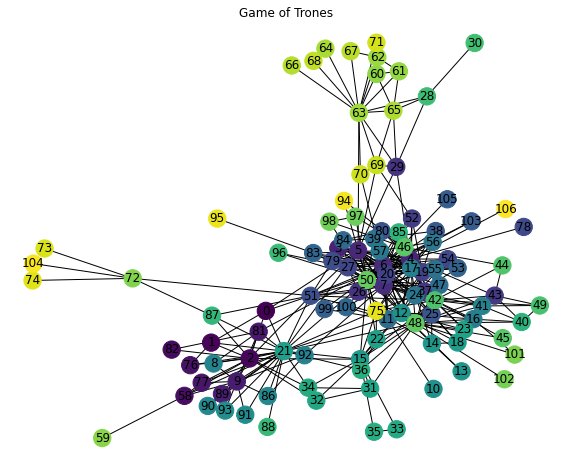

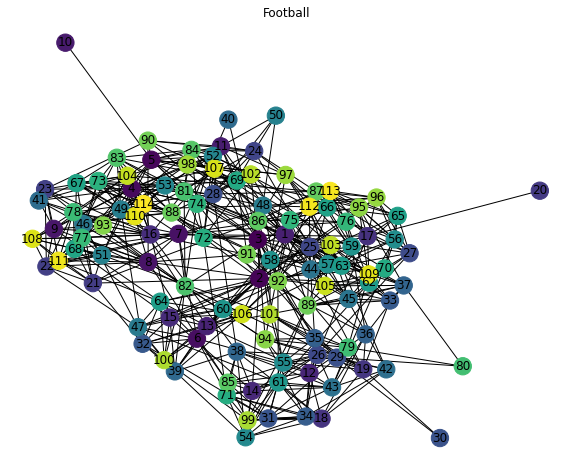

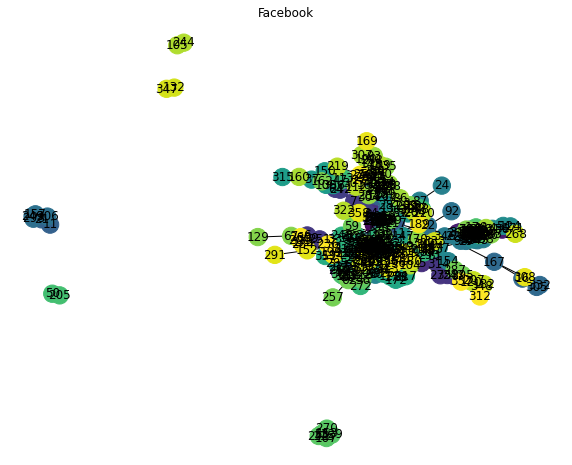

[None, None, None]

In [6]:
Visualizando as Redes: 

# Visualizando as redes
[ver(redes[i], titulo = nomes[i], cor=range(len(redes[i]))) for i in range(len(nomes))]

In [7]:
Para a realização do exercício considerou-se, as redes como sendo não ponderadas, não direcionais, conexas, além de usarmos, apenas, o maior compononte de cada rede.

,Número de Vértices,Número de Arestas
Game of Trones,107,352
Football,114,596
Facebook,329,1954


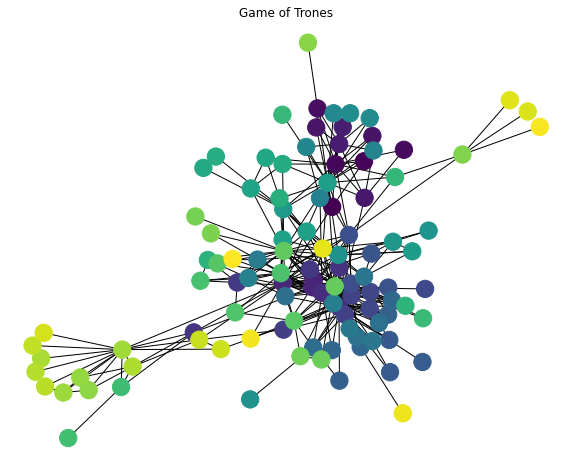

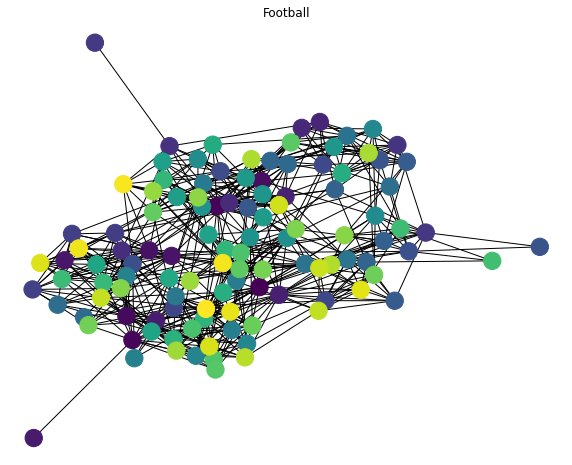

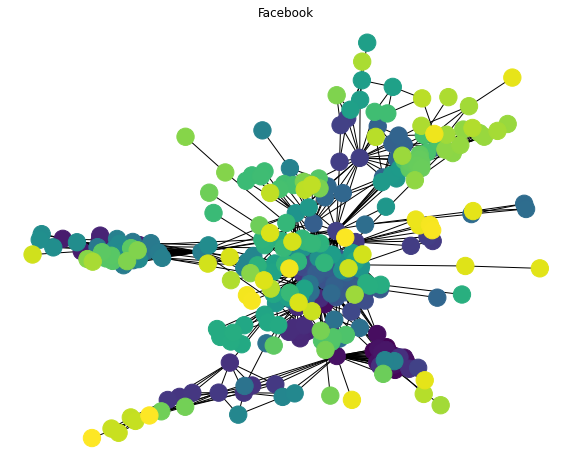

[None, None, None]

In [8]:
# Ajustando as redes
redes = [ajuste_grafo(redes[i]) for i in range(len(redes))]

# Informações sobre as redes
info(redes,nomes)

[ver(redes[i], titulo = nomes[i], cor=range(len(redes[i])), label=False ) for i in range(len(redes))]

In [9]:
Na sequência calculamos, para cada rede, as medidas relacionadas a:

* Grau

* Transitividade

* Distância

In [10]:
def degree_distribution(GER):
    '''
    Distribuiição de Graus  
    '''
    vk = dict(GER.degree()) # converte em dicionario
    vk = list(vk.values()) # pega o valor dos graus
    maxk = np.max(vk) 
    mink = np.min(min)
    kvalues= arange(0,maxk+1) # possiveis valores de k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1 # contador 
    Pk = Pk/sum(Pk) # Soma de P(k) é igual a 1
    return kvalues,Pk


def momment_of_degree_distribution(G,m):
    '''
    Calcula momento da distribuição
    '''
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def coef_compl(rede):
  alfa = momment_of_degree_distribution(rede,2) / momment_of_degree_distribution(rede,1)
  return alfa

def shannon_entropy(G):
  '''
  Calcula e entropia de Shannon - 
  (Quantifica o nível de heterogeneidade da rede em relação ao número de conexões)
  '''
  k,Pk = degree_distribution(G)
  H = 0
  for p in Pk:
      if(p > 0):
          H = H - p*math.log(p, 2)
  return H   

def prop_rede(G, base = " ", imp = False):
  '''
  Calcula as propriedades da Rede
  '''

  #num_node = G.number_of_nodes()
  #num_vert = G.number_of_edges()
  #grau_med = np.mean(array(list(dict(G.degree()).values()))) # media dos graus de cada vertice da rede
  primeiro_momento = momment_of_degree_distribution(G,1) # igual ao grau medio
  segundo_momento = momment_of_degree_distribution(G,2)
  variancia = segundo_momento - primeiro_momento**2
  med_coef_grupo = nx.transitivity(G) # fraçao do numero de triangulos na rede
  med_cluster = nx.average_clustering(G) # av_cl O nível de triângulos em uma rede
  complexidade = coef_compl(G) # k2/k
  se = shannon_entropy(G) # mede a heterogeneidade da rede
  E = nx.global_efficiency(G) #  eficiência média de todos os pares de nós
  leff = nx.local_efficiency(G) # caracteriza o quão bem as informações são trocadas pelos vizinhos de um nó
  l = nx.average_shortest_path_length(G) # comprimento médio do caminho mais curto.
  r = nx.degree_assortativity_coefficient(G) #  coeficiente de correlação de Pearson do grau em cada extremidade de uma aresta.
  pr = [primeiro_momento , segundo_momento , variancia , med_coef_grupo , med_cluster , complexidade , se , E , leff , l , r]

  if imp:
    print(f'Base: {base}\nGrau Medio: {pr[0]:.3f}\nSegundo Momento: {pr[1]:.3f}\nVariância: {pr[2]:.3f}\nMedia Coeficiente de Agrupamento: {pr[4]:.3f}\nTransitidade: {pr[3]:.3f}\nComplexidade: {pr[5]:.3f}\nEntropia de Shannon: {pr[6]:.3f}\nEficiência Global: {pr[7]:.3f}\nEficiência Local: {pr[8]:.3f}\nAv. Short Path: {pr[9]:.3f}\nAssortividade: {pr[10]:.3f}\n' )

  return pr

In [11]:
Propriedades das Redes

Base: Game of Trones
Grau Medio: 6.579
Segundo Momento: 86.598
Variância: 43.309
Media Coeficiente de Agrupamento: 0.551
Transitidade: 0.329
Complexidade: 13.162
Entropia de Shannon: 3.715
Eficiência Global: 0.398
Eficiência Local: 0.661
Av. Short Path: 2.904
Assortividade: -0.131

Base: Football
Grau Medio: 10.456
Segundo Momento: 118.649
Variância: 9.318
Media Coeficiente de Agrupamento: 0.381
Transitidade: 0.360
Complexidade: 11.347
Entropia de Shannon: 2.546
Eficiência Global: 0.457
Eficiência Local: 0.497
Av. Short Path: 2.465
Assortividade: -0.097

Base: Facebook
Grau Medio: 11.878
Segundo Momento: 260.863
Variância: 119.766
Media Coeficiente de Agrupamento: 0.605
Transitidade: 0.512
Complexidade: 21.961
Entropia de Shannon: 4.773
Eficiência Global: 0.326
Eficiência Local: 0.722
Av. Short Path: 3.584
Assortividade: 0.074



medidas = ['Grau', '2 momento', 'Var','MCoefAgrup','Transitividade', 'Complexidade','E.Shannon','Efic.Global','Efic.Local','AShortPath','Assortividade']
X_nets = [prop_rede(redes[i] , base = nomes[i] , imp = True) for i in range(len(redes))]

In [12]:
Na sequência, geramos os modelos de redes:

* Erdos-Renyi (ER)

* Small Word (SW)

* Barabási-Albert (BA)

* Modelo de Configuração (MC)

* 

In [13]:
# Funçoes que geram os modelos de redes
def erdos(N,d):
  '''
  Gera Rede Erdos-Renyi
  '''
  p = (d / (N - 1))
  G = nx.gnp_random_graph(N, p, seed = 2021, directed = False)
  return ajuste_grafo(G)

def small(N,k,p):
  '''
  Gera Rede Small-World
  '''
  G = nx.watts_strogatz_graph(N, int(k), p, seed=None)
  return ajuste_grafo(G)

def BA(N,d):
  '''
  Gera Rede Barabási-Albert 
  '''
  m = int(d/2)
  G = nx.barabasi_albert_graph(N, m)
  return ajuste_grafo(G)

# dando erro ao calcular as propriedades da rede
def MC(N):
  '''
  Gera Rede Configuração de Modelo
  '''
  a = 2.5
  seq = np.random.zipf(a, N) #Zipf distribution
  if(sum(seq)%2 != 0): # the sum of stubs have to be even
      pos = randint(0, len(seq))
      seq[pos] = seq[pos]+ 1
  GCM = nx.configuration_model(seq)
  return ajuste_grafo(GCM)

3 90 3


cl = ['ER','WS','BA']
XR , yr = [],[] # armazena as propriedades da rede j
for j in range(len(redes)):
  N = len(redes[j])  # num vertice da rede j
  av_degree = X_nets[j][0] # grau medio da rede j  
  X = [] # armazena as medidas da rede
  y = [] # armazena as classes
  n_nets = 30 # numero de redes geradas

  #ER networks
  for i in range(n_nets):
    GER = erdos(N,av_degree)
    X.append(prop_rede(GER))
    y.append(0.0)

  #WS networks
  p = 0.1 #probability of rewiring
  for i in range(0,n_nets):
    GWS = small(N,av_degree,p)
    X.append(prop_rede(GWS))
    y.append(1.0)

  # BA networks
  for i in range(0,n_nets):
      GBA = BA(N, av_degree)   
      X.append(prop_rede(GBA))
      y.append(2.0)






  XR.append(X) # lista com todos dados de treinamento
  yr.append(y) # lista com os rotulos
Xa = np.array(XR) # converte conjunto de treino para array
ya = np.array(yr) 
print(len(Xa),len(Xa[0]),len(ya)) 
# MC networks
#for i in range(0,n_nets):
#    GMC = MC(N)   
#    X.append(prop_rede(GMC))
#    y.append(3.0)

Usamos o método do cotovelo para determinar o número de clusters adequados.

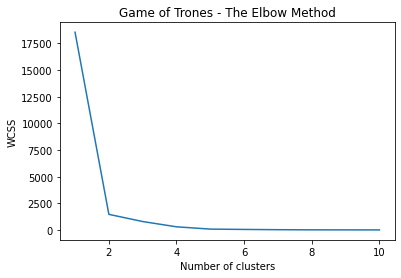

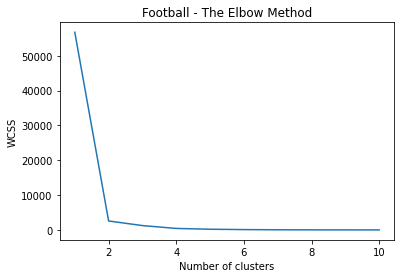

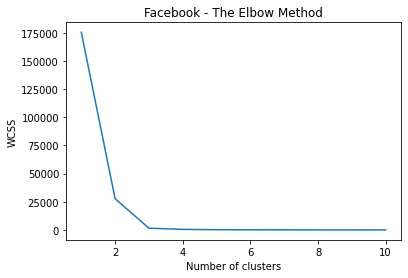

In [14]:
from sklearn.cluster import KMeans
for j in range(len(redes)):
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(Xa[j])
      wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title(f'{nomes[j]} - The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

Definimos k = 4 como valor adequado. Na sequência realizamos a classificação

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
yp=[]
for j in range(len(Xa)):
  # Normalizando conjunto de treinamento
  scaler = StandardScaler().fit(Xa[j])
  X = scaler.transform(Xa[j])
  y = ya[j]
  # Normalizando conjunto de teste
  X_net = np.array(X_nets[j])
  X_net = X_net.reshape(1,len(X_net)) 
  X_net = scaler.transform(X_net)
  k = 5
  model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model.fit(X,y)
  # faz a predição no conjunto de teste
  y_pred = model.predict(X_net) 
  yp.append(y_pred)
  print(f'Rede: {nomes[j]}, Classe: {cl[int(y_pred)]}')

Rede: Game of Trones, Classe: BA
Rede: Football, Classe: WS
Rede: Facebook, Classe: BA


Dessa forma, rejeita-se a hipótese de redes do mesmo tipo seguirem o mesmo modelo.

Na sequência, vamos verificar quais os atributos mais contribuiram para classificação. 

Para isso, construimos a seleção de atributos *Feature importance* com o modelo Árvore. 


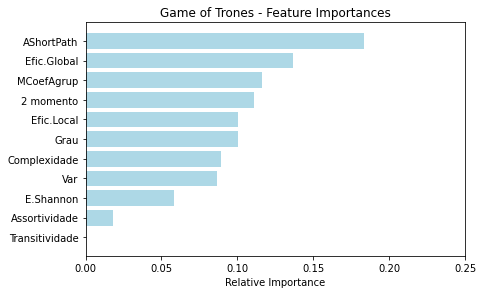

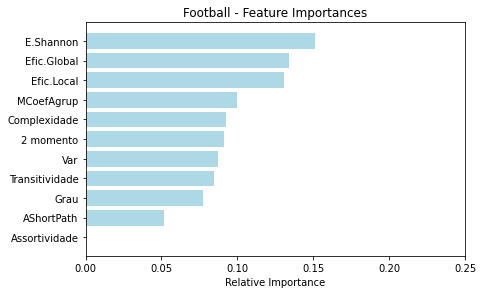

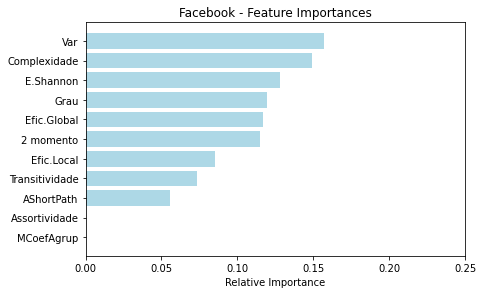

In [16]:
for j in range(3):
  X = Xa[j].copy()
  y = ya[j].copy()

  n_folds = 2 # cv folds externos
  k_folds = 2 # cv folds internos
  p_grid = {
      'n_estimators'      : [10,50,100],
      'max_depth'         : [5, 7, 15],
      'max_features': ['auto', 'sqrt', 'log2'],
      'criterion' :['gini','entropy']
  }
  # define cv externo
  cv_outer = KFold(n_folds, shuffle=True)
  test_acc_results = list()
  v = []
  # loop CV externo 
  for train_i, test_i in cv_outer.split(X):
    # usa indices para pegar os dados efetivamente
      train_x, train_y = X[train_i], y[train_i]
      test_x, test_y = X[test_i], y[test_i]
      # modelo base
      model = RandomForestClassifier()
      # cross validation interno (variando conjunto de validação) 
      grid_search_cv = GridSearchCV(model, p_grid, cv=k_folds, 
                                    scoring='accuracy', refit=True)
      result = grid_search_cv.fit(train_x, train_y)
      
      # retreina melhor modelo  com (treino + validação)
      best_model = result.best_estimator_
      # faz a previsão no fold de teste 
      pred_y = best_model.predict(test_x) 
      # evaluate and store the results
      #print('Accuracy:', accuracy_score(test_y, pred_y))
      v.append(best_model.feature_importances_)

  v = np.array(v)
  v = np.mean(v,axis = 0)
  v = v/np.sum(v)

  importances = v
  attributes = medidas.copy()
  indices = np.argsort(importances)
  attributes_rank = []
  for i in indices:
      attributes_rank.append(attributes[i])

  fig, ax = plt.subplots()  
  #plt.figure(figsize=(5,10))
  plt.title(f'{nomes[j]} - Feature Importances')
  plt.tight_layout()
  plt.barh(range(len(indices)), importances[indices], color='lightblue', align='center')
  plt.yticks(range(len(indices)), attributes_rank)
  plt.xlabel('Relative Importance')
  plt.xticks(color='k')
  plt.yticks(color='k')
  plt.xlim([0.0, 0.25])
  plt.show()


In [ ]:
#Redes Biológicas

